# Rede Neural básica aplicada aos dados

In [ ]:
#%tensorflow_version 2.x

In [18]:
# Imports do notebook v2
import os
import zipfile
from google.colab import files
from tqdm import tqdm
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Imports do curso
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np

In [2]:
print(tensorflow.__version__)

2.5.0


### Upload dos dados a partir de um arquivo .zip

In [3]:
uploaded = files.upload()

Saving blood_input_as_zip.zip to blood_input_as_zip.zip


In [4]:
local_zip = '/content/blood_input_as_zip.zip' # Caminho referente ao local onde os dados são armazenados quando é feito o upload manualmente
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

class_names = ['eosinofilo', 'linfocito', 'monocito', 'neutrofilo']
nb_classes = len(class_names)
image_size = (150,150)

In [5]:
# Lendo dados descompactados a partir dos subdiretórios baixados

# Diretorio com imagens de treino de eosinofilo
train1 = os.path.join('/content/blood_input_as_zip/train/eosinofilo')
# Diretorio com imagens de validação de eosinofilo 
valid1 = os.path.join('/content/blood_input_as_zip/valid/eosinofilo')
# Diretorio com imagens de teste de eosinofilo 
test1 = os.path.join('/content/blood_input_as_zip/test/eosinofilo')

# Diretorio com imagens de treino de linfocito
train2 = os.path.join('/content/blood_input_as_zip/train/linfocito')
# Diretorio com imagens de validação de linfocito 
valid2 = os.path.join('/content/blood_input_as_zip/valid/linfocito')
# Diretorio com imagens de teste de linfocito 
test2 = os.path.join('/content/blood_input_as_zip/test/linfocito')

# Diretorio com imagens de treino de monocito
train3 = os.path.join('/content/blood_input_as_zip/train/monocito')
# Diretorio com imagens de validação de monocito 
valid3 = os.path.join('/content/blood_input_as_zip/valid/monocito')
# Diretorio com imagens de teste de monocito 
test3 = os.path.join('/content/blood_input_as_zip/test/monocito')

# Diretorio com imagens de treino de neutrofilo
train4 = os.path.join('/content/blood_input_as_zip/train/neutrofilo')
# Diretorio com imagens de validação de neutrofilo 
valid4 = os.path.join('/content/blood_input_as_zip/valid/neutrofilo')
# Diretorio com imagens de teste de neutrofilo 
test4 = os.path.join('/content/blood_input_as_zip/test/neutrofilo')


print('total train eosinofilo:', len(os.listdir(train1)))
print('total valid eosinofilo:', len(os.listdir(valid1)))
print('total test eosinofilo:', len(os.listdir(test1)))


print('total train linfocito:', len(os.listdir(train2)))
print('total valid linfocito:', len(os.listdir(valid2)))
print('total test linfocito:', len(os.listdir(test2)))

print('total train monocito:', len(os.listdir(train3)))
print('total valid monocito:', len(os.listdir(valid3)))
print('total test monocito:', len(os.listdir(test3)))

print('total train neutrofilo:', len(os.listdir(train4)))
print('total valid neutrofilo:', len(os.listdir(valid4)))
print('total test neutrofilo:', len(os.listdir(test4)))

total train eosinofilo: 455
total valid eosinofilo: 114
total test eosinofilo: 143
total train linfocito: 168
total valid linfocito: 43
total test linfocito: 53
total train monocito: 102
total valid monocito: 26
total test monocito: 32
total train neutrofilo: 1059
total valid neutrofilo: 265
total test neutrofilo: 332


### Normalização e Input dos dados

In [11]:
# Função que lê as imagens e retorna-as em 2 arrays: images e labels
def loadDataset():
    datasets = ['/content/blood_input_as_zip/train/','/content/blood_input_as_zip/valid/', '/content/blood_input_as_zip/test/' ]
    images = []
    labels = []
    image_size = (150,150)
    # iterar nos datasets de treino e validação
    for dataset in datasets:
        # iterar nas subpastas dos datasets
        for folder in os.listdir(dataset):
            if   folder in ['eosinofilo']: label = 0
            elif folder in ['linfocito']:  label = 1
            elif folder in ['monocito']:   label = 2
            elif folder in ['neutrofilo']: label = 3
            # iterar em cada imagem dos datasets
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                # pegar caminho de cada imagem
                img_path = os.path.join(os.path.join(dataset, folder), file)
                # abrir e redimensionar cada imagem
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_size)
                # adicionar a imagem e seu label correspondente  à saída
                images.append(image)
                labels.append(label)
    # Criar arrays com as saídas (imagens e labels)
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')
    return images, labels

In [14]:
# Combinar todas as imagens originais em um único dataset
images, labels = loadDataset()

100%|██████████| 332/332 [00:01<00:00, 243.06it/s]


In [19]:
# Embaralhar os dados e separar novos conjuntos de  treinamento (80%), validação (10%) e teste (10%)
images, labels = shuffle(images, labels, random_state=10)
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2)
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size = 0.5)

In [25]:
n_train = train_labels.shape[0]
n_val = val_labels.shape[0]
n_test = test_labels.shape[0]

print("Quantidade de imagens para treinamento: {}".format(n_train))
print("Quantidade de imagens para validação: {}".format(n_val))
print("Quantidade de imagens para teste: {}".format(n_test))

Quantidade de imagens para treinamento: 2233
Quantidade de imagens para validação: 280
Quantidade de imagens para teste: 279


In [ ]:
# Exploração dos dados
print(len(imagens_treino))
#imagens_treino.shape
#imagens_teste.shape
#len(identificacoes_teste)
# identificacoes_treino.min()
identificacoes_treino.max()

60000


9

### Modelo - Curso Alura

In [31]:
# Normalização
train_images = train_images / 255.0 
# Criação do modelo
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(150, 150, 3)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2), # "Adormecendo" 20% dos dados, um tipo de normalização
    keras.layers.Dense(128, activation=tensorflow.nn.relu), # Add nova camada intermerdiária 2º teste
    keras.layers.Dropout(0.2), # "Adormecendo" 20% dos dados, um tipo de normalização
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2), # "Adormecendo" 20% dos dados, um tipo de normalização
    keras.layers.Dense(10, activation=tensorflow.nn.softmax),
    keras.layers.Dropout(0.2) # "Adormecendo" 20% dos dados, um tipo de normalização
])

# Compilando o modelo
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

# Treinando o modelo
historico = modelo.fit(train_images, train_labels, epochs=100, validation_split = 0.2) #validation_split = 0.2 20% pra teste

Epoch 1/100
56/56 [==============================] - 1s 14ms/step - loss: 4.4932 - accuracy: 0.5129 - val_loss: 1.5444 - val_accuracy: 0.5705
Epoch 2/100
56/56 [==============================] - 1s 10ms/step - loss: 3.7887 - accuracy: 0.5224 - val_loss: 1.1509 - val_accuracy: 0.5705
Epoch 3/100
56/56 [==============================] - 1s 10ms/step - loss: 3.7839 - accuracy: 0.5246 - val_loss: 1.3154 - val_accuracy: 0.5705
Epoch 4/100
56/56 [==============================] - 1s 10ms/step - loss: 4.0238 - accuracy: 0.5039 - val_loss: 1.2614 - val_accuracy: 0.5705
Epoch 5/100
56/56 [==============================] - 1s 10ms/step - loss: 3.9475 - accuracy: 0.5213 - val_loss: 1.3150 - val_accuracy: 0.5705
Epoch 6/100
56/56 [==============================] - 1s 10ms/step - loss: 3.6992 - accuracy: 0.5207 - val_loss: 1.2517 - val_accuracy: 0.5705
Epoch 7/100
56/56 [==============================] - 1s 10ms/step - loss: 3.8227 - accuracy: 0.5134 - val_loss: 1.1820 - val_accuracy: 0.5705
Epoch 

### Salvando e carregando o modelo

In [ ]:
modelo.save("modelo.h5")
modelo_salvo = load_model("modelo.h5")

### Gráficos de acurácia e validação por época

In [ ]:
historico

In [ ]:
historico.history

In [ ]:
historico.history['accuracy']

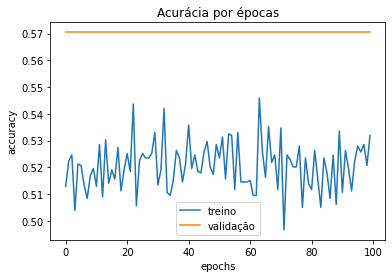

In [32]:
# Gráfico comparativo train x valid
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['treino','validação'])

### Gráficos de perda e validação por época

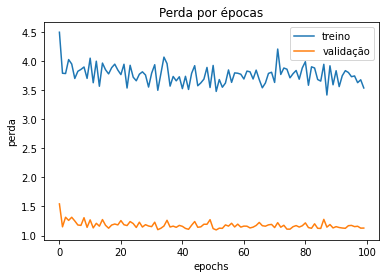

In [33]:
# Gráfico da perda
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('epochs')
plt.ylabel('perda')
plt.legend(['treino','validação'])

### Testando o Modelo

In [ ]:
testes = modelo.predict(imagens_teste)
print('Resultado teste:',np.argmax(testes[0]))
print('Número da imagem de teste teste:',identificacoes_teste[0])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado teste:',np.argmax(testes_modelo_salvo[0]))
print('Número da imagem de teste teste:',identificacoes_teste[0])

### Avaliando o modelo

In [ ]:
# Função de avaliação
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste) #(perda, acuracia)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

perda_teste2, acuracia_teste2 = modelo_salvo.evaluate(imagens_teste, identificacoes_teste) #(perda, acuracia)
print('Perda do teste:', perda_teste2)
print('Acurácia do teste:', acuracia_teste2)